In [1]:
#######################################
###   Import stuff
#######################################
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [15]:
#######################################
###   Define functions
#######################################
def get_node_colors(N,dis_state):
    """Colors nodes based on their state"""
    color_map =  [None] * N
    for i in range(N):
        if(dis_state[i]==0):
            color_map[i] = 'cyan'
        elif(dis_state[i]==1):
            color_map[i] = 'yellow'
        elif(dis_state[i]==2):
            color_map[i] = 'red'
        elif(dis_state[i]==3):
            color_map[i] = 'blue'
        else:
            color_map[i] = 'purple'
    return color_map

def plot_network(G,pos,color_map=-99):
    """Plots a network with given node position and color"""
    if(color_map==-99):
        color_map  = ['cyan'] * len(G)
    plt.figure()
    nx.draw(G, pos, node_color=color_map, with_labels=True)
    plt.show()

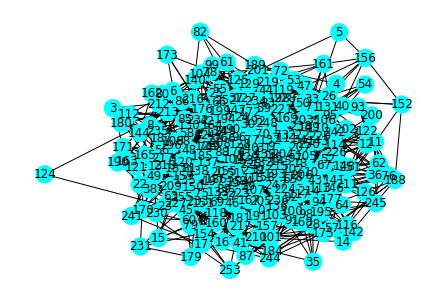

In [16]:
#######################################
###   Parameters
#######################################

##Simulation
num_time_steps = 100

##Network
N = 256
mean_k = 10
link_prob = np.clip(mean_k/(N-1),0,1)

##Disease
initial_fraction_I = 4/20
infection_rate = 0.05
recovery_rate = 1/7
relapse_rate = 1/30

#######################################
###   Create network
#######################################

G = nx.erdos_renyi_graph(N,link_prob)
pos=nx.spring_layout(G)
adj_mat = nx.to_numpy_matrix(G, nodelist=None)

plot_network(G,pos)

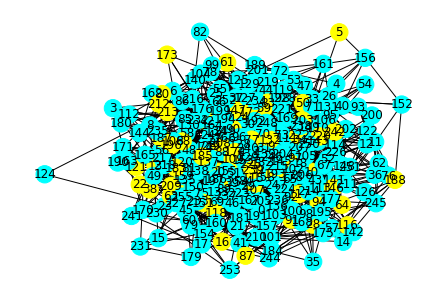

In [17]:
#######################################
###   Set up
#######################################

#data recording
S_over_time = np.zeros(num_time_steps)
nI_over_time = np.zeros(num_time_steps)
I_over_time = np.zeros(num_time_steps)
R_over_time = np.zeros(num_time_steps)

#codes
S_code = 0
new_I_code = 1
I_code = 2
R_code = 3
V_code = 4

#make some people susceptible and some newly infected
dis_state = np.random.choice([S_code,new_I_code],N,p=[(1-initial_fraction_I),initial_fraction_I])

color_map = get_node_colors(N,dis_state)
plot_network(G,pos,color_map)

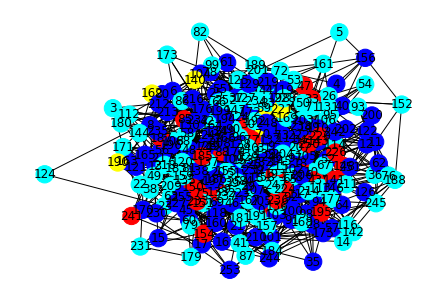

Text(0, 0.5, 'fraction of population')

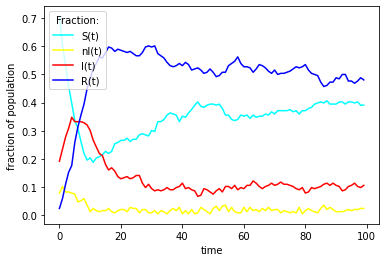

In [18]:
#######################################
###   Run simulation
######################################
DEBUGGING = False
for t in range(num_time_steps):
    
    if(DEBUGGING):
        print('The time step is ' + str(t) + ' and this is how it starts.')
        color_map = get_node_colors(N,dis_state)
        plot_network(G,pos,color_map)
        plt.show()
        
    ##infections take hold
    dis_state[dis_state==new_I_code] = I_code
    
    if(DEBUGGING):
        print('The time step is ' + str(t) + ' and now infections have sunk in.')
        color_map = get_node_colors(N,dis_state)
        plot_network(G,pos,color_map)
        plt.show()
        
    ##infections spread
    #loop over people
    for person in range(N):
        #if they are susceptible
        if(dis_state[person]==S_code):
            #find the number of infected neighbors
            num_infected_neighbors = np.sum(np.logical_and(np.ravel(adj_mat[person,:]==1),dis_state==I_code))
            #use the number of infected neighbors to get the probability of infection
            prob_spread = 1 - (1-infection_rate)**num_infected_neighbors
            #print(person)
            #print(prob_spread)
            #spread probabalistically
            if(np.random.rand()<prob_spread):
                dis_state[person] = new_I_code

         
    if(DEBUGGING):
        print('The time step is ' + str(t) + ' and now infections have spread.')
        color_map = get_node_colors(N,dis_state)
        plot_network(G,pos,color_map)
        plt.show()
    
    ##recovery
    #get the number of infected people
    num_infected = np.sum(dis_state==I_code)
    #replace infecteds with recovered according to recovery rate
    dis_state[dis_state==I_code] = np.random.choice([R_code,I_code],num_infected,p=[recovery_rate,(1-recovery_rate)])

    if(DEBUGGING):
        print('The time step is ' + str(t) + ' and now folks have recovered.')
        color_map = get_node_colors(N,dis_state)
        plot_network(G,pos,color_map)
        plt.show()
        
    ##resistance relapse
    #get the numger of recovered people
    num_recovered = np.sum(dis_state==R_code)
    #replace recovered with susceptibles according to relapse rate
    dis_state[dis_state==R_code] = np.random.choice([S_code,R_code],num_recovered,p=[relapse_rate,(1-relapse_rate)])

        
    if(DEBUGGING):
        print('The time step is ' + str(t) + ' and now folks have become susceptible again.')
        color_map = get_node_colors(N,dis_state)
        plot_network(G,pos,color_map)
        plt.show()
        

    #record some data
    S_over_time[t] = np.sum(dis_state==S_code)
    nI_over_time[t] = np.sum(dis_state==new_I_code)
    I_over_time[t] = np.sum(dis_state==I_code)
    R_over_time[t] = np.sum(dis_state==R_code)

    
color_map = get_node_colors(N,dis_state)
plot_network(G,pos,color_map)

plt.figure()
plt.plot(S_over_time/N, label='S(t)', color='cyan')
plt.plot(nI_over_time/N, label='nI(t)', color = 'yellow')
plt.plot(I_over_time/N, label='I(t)', color = 'red')
plt.plot(R_over_time/N, label='R(t)', color='blue')
plt.legend(title='Fraction:')
plt.xlabel('time')
plt.ylabel('fraction of population')

In [6]:
person = 1
np.ravel(adj_mat[person,:]==1

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False])

array([False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False,  True, False])

In [8]:
np.sum(np.logical_and(np.ravel(adj_mat[person,:]==1),dis_state==I_code))

2

In [9]:
dis_state
dis_state[dis_state==new_I_code] = I_code


In [10]:
np.sum(dis_state==I_code)

5

In [11]:
num_infected = np.sum(dis_state==I_code)
np.random.choice([R_code,I_code],num_infected,p=[recovery_rate,(1-recovery_rate)])

array([2, 2, 2, 2, 2])